In [1]:
from transformers import AutoTokenizer
from datasets import load_dataset

dataset = load_dataset("imdb")

wordpiece_tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
bpe_tokenizer = AutoTokenizer.from_pretrained("gpt2")

sample_text = dataset["train"][0]["text"]
wordpiece_tokens = wordpiece_tokenizer.tokenize(sample_text)

bpe_tokens = bpe_tokenizer.tokenize(sample_text)

print("WordPiece Tokens:", wordpiece_tokens)
print("BPE Tokens:", bpe_tokens)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

WordPiece Tokens: ['i', 'rented', 'i', 'am', 'curious', '-', 'yellow', 'from', 'my', 'video', 'store', 'because', 'of', 'all', 'the', 'controversy', 'that', 'surrounded', 'it', 'when', 'it', 'was', 'first', 'released', 'in', '1967', '.', 'i', 'also', 'heard', 'that', 'at', 'first', 'it', 'was', 'seized', 'by', 'u', '.', 's', '.', 'customs', 'if', 'it', 'ever', 'tried', 'to', 'enter', 'this', 'country', ',', 'therefore', 'being', 'a', 'fan', 'of', 'films', 'considered', '"', 'controversial', '"', 'i', 'really', 'had', 'to', 'see', 'this', 'for', 'myself', '.', '<', 'br', '/', '>', '<', 'br', '/', '>', 'the', 'plot', 'is', 'centered', 'around', 'a', 'young', 'swedish', 'drama', 'student', 'named', 'lena', 'who', 'wants', 'to', 'learn', 'everything', 'she', 'can', 'about', 'life', '.', 'in', 'particular', 'she', 'wants', 'to', 'focus', 'her', 'attention', '##s', 'to', 'making', 'some', 'sort', 'of', 'documentary', 'on', 'what', 'the', 'average', 'sw', '##ede', 'thought', 'about', 'certain

Token indices sequence length is longer than the specified maximum sequence length for this model (718 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1168 > 1024). Running this sequence through the model will result in indexing errors


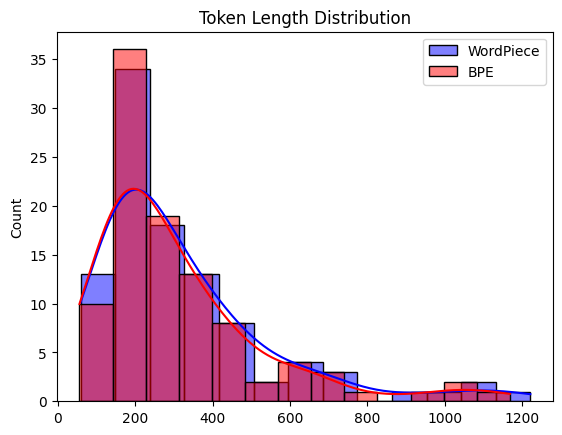

WordPiece Vocabulary Size: 30522
BPE Vocabulary Size: 50257


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

def get_token_lengths(tokenizer, dataset):
    token_lengths = [len(tokenizer.tokenize(text)) for text in dataset['train']['text'][:100]]
    return token_lengths

wordpiece_lengths = get_token_lengths(wordpiece_tokenizer, dataset)
bpe_lengths = get_token_lengths(bpe_tokenizer, dataset)

sns.histplot(wordpiece_lengths, color='blue', label='WordPiece', kde=True)
sns.histplot(bpe_lengths, color='red', label='BPE', kde=True)
plt.legend()
plt.title("Token Length Distribution")
plt.show()

print("WordPiece Vocabulary Size:", wordpiece_tokenizer.vocab_size)
print("BPE Vocabulary Size:", bpe_tokenizer.vocab_size)
